##LAB 5 

Author: Kyle Sprague 
Date: 3/30/2022 



As stated in the prelab, the primary goal of this lab is to determine how gamma rays interact with matter and to identify an unknown source. We will also analyze how time, distance, and shielding effect the number of photons striking a radioactive source. 

<center> 
<b>
Modeling the Effect of Shielding and Distance on Count Rate
</b>
</center> 

<center> 
<i> 
Unshielded Model 
</i>
</center>

If we model each of the radioactive sources, Cs-137 and Co-60, as a point source emitting $$S$$ particles per second from a point isotrocpically, then the number of particles striking the edge of a sphere containing the particles is given by the inverse square law. In our set up, the point at the edge of the sphere is the detector and the number of particles striking the detector is S_0 while the distance to the detector is the radius of the sphere, d. The inverse square law is 

$$\frac{S}{4 \pi d^2} \propto \frac{1}{R^2}.$$ EQ 2.1

Using the inverse square law, we can model the number of particles striking the detector for the case where we do not have a shield in place. Since we very our distance from the source to detector, the dependent variable will be the distance while the independent variable is the $S$ values we obtain by computing 

$$S = (S+B)-B$$ EQ 2.2

where $B$ is the background count rate and $S$ is the source count rate. Note that 

$$B = \frac{N_B}{t_B}$$ where $$t$$ is the time we alot to count the number of photons that strike the detector. Note that equation 2.2 can be broken down into the following consitutent components: 

$\frac{N_{S+B}}{t_{S+B}} - \frac{N_B}{t_B}$ where $t_{S+B} = t_{B}$ and $N_{S+B}$ is what the detector measures whenever we incorporate a radioactive source (as opposed to just measuring the background counts $N_B$). While we also use Equation 2.2 to obtian the number of particles leaving the source per second when using shields, the inverse square law can no longer be used to model the data. 

<center> 
<i> 
Shielded Model 
</i>
</center> 

By modeling the effect of shielding on the obtained source count rate, we can estimate the value of the linear attenuation coefficient $\mu = \frac{\rho}{\lambda}$ for the material we use as a shield. This can then be used to identify the shielding material by plugging in the appropriate energies for Cs-137 and Co-60 into the Photon Cross Section Database (XCOM). The gamma ray emisison energy for Cs-137 is $0.662 MeV$ whereas for Co-60 we have two energies at $1.17 MeV$ and $1.33 Mev$. If the $\mu$ values obtained for each radioactive substance matches that which we expect for the attentuation of aluminum at $$0.662 MeV$$, $1.17 MeV$, and $1.33Mev$, then we keep our hypothesis as to the shielding substance's identity. Looking at the data base, we find that at $0.662 Mev$, $\mu = 7.443 \times 10^{-2} \frac{cm^2}{g}$, at $1.17 Mev$, $\mu = 5.683 \times 10^{-2} \frac{cm^2}{g}$, and at $1.33 MeV$, $\mu = 5.525 \times 10^{-2} \frac{cm^2}{g}$.  

To create our model, we consider a beam of photons upon a material of thickness L. If the infiniseimal change in the number of photons in the beam $dN$ within and infinitesimally small distance $dl$ is $dN = -\mu N dl$, we can derive an expression for the number of photons left after traveling L by separating our variables $l$ and $N$ and integrating the left hand side from $N_s$ to $N_L$ and the right hand side from 0 to L. $N_s$ is the number of counts when the background data is subtracted and is equivalent to $N_s t_s$; $t_s$ is the same as $t_b$ from the unshielded data. When we separate our variables, we obtain,

$$\frac{DN}{N} = -\mu dl$$, 

which we can now integrate to get 

$$\int_{N_s}^{N_L} \frac{dN}{N} = -\mu \int_{0}^{L} dl$$ 

$$\ell n (N_L) - \ell n(N_s) = -\mu L$$ 

$$\frac{N_L}{N_s} = e^{-\mu L}$$ 

$$N_L = N_s e^{-\mu L}$$. 

Replacing L with x, this becomes 

$$N(x) = N_s e^{(\frac{-\mu}{\rho})(\rho x)}$$ EQ2.3. 

The reason we write the exponential term in terms of $\rho x$ is that $\rho x$ is the value present on the shield's storage box. Note that our value for $\frac{\mu}{\rho}$ will change for each photonic energy that a gamma ray is emitted at, meaning that Co-60 we need two exponential functions and our model takes the form 

$$N = N_1 e^{(\frac{-\mu}{\rho})_1 (\rho x)} + N_2 e^{(\frac{-\mu}{\rho})_2 (\rho x)}$$ EQ 2.4







In [ ]:
!pip3 install lmfit  

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 KB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.4/98.4 KB 5.0 MB/s eta 0:00:00


In [ ]:
##importing relevant libraries 
import glob
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt 
import lmfit as lm
from lmfit import Model
import scipy  
import scipy.signal as signal 
from scipy import stats 
from google.colab import drive  
drive.mount('/content/drive/')  

Mounted at /content/drive/


##Part 1: creating a model of source count rate and distance for the source to compare to the blocked case



In [ ]:
#I: Importing relevant data 
unshielded_files = [file for file in glob.glob("/content/drive/MyDrive/Sprague | 231/L_5/L5_data/p1/*csv") if "Unshielded" in file]  
print(unshielded_files)
cs_137_unshielded_df = pd.read_csv(unshielded_files[0]) 
co_60_unshielded_df = pd.read_csv(unshielded_files[1])

['/content/drive/MyDrive/Sprague | 231/L_5/L5_data/p1/Unshielded_S_and_B_data_cesium_137.csv', '/content/drive/MyDrive/Sprague | 231/L_5/L5_data/p1/Unshielded_S_and_B_data_cobalt_60.csv']


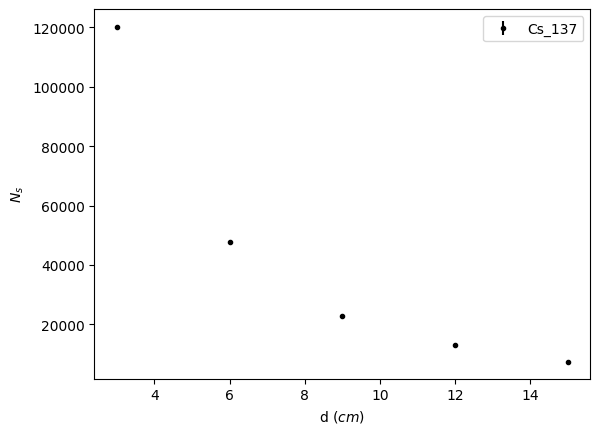

In [ ]:
##II: Plotting Cesium-137 Unshielded Data 

def N_s_and_d_plotter(df: "Pandas.DataFrame", isotope_names: list, unshielded = True): 
  if unshielded == True: 
    #yerror = s_error_calculator(df)
    #add yerror to below function 
    plt.errorbar(np.array(df["d_0_(cm)"]), df["N_s"], yerr = np.sqrt(df["N_s"].to_numpy()), fmt = ".", color = "black", ) # xerr in cm
    #the y_error is so small you can't see it 
    plt.ylabel(r"$N_s$")
    plt.xlabel(r"d ($cm$)")   
    plt.legend(isotope_names)  


N_s_and_d_plotter(cs_137_unshielded_df, ["Cs_137"]) 


model values are [ 13549.20907949  16101.1089074   21614.47273313  37366.94080663
 122430.26840354]
[[Model]]
    Model(unshielded_model_func)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 5
    # variables        = 2
    chi-square         = 1.5976e+08
    reduced chi-square = 53252030.0
    Akaike info crit   = 90.3986043
    Bayesian info crit = 89.6174801
    R-squared          = 0.98130588
[[Variables]]
    N_s:  12827247.6 +/- 1022170.07 (7.97%) (init = 100000)
    c:    9012.49827 +/- 4201.15216 (46.61%) (init = 9000)
[[Correlations]] (unreported correlations are < 0.100)
    C(N_s, c) = -0.6297


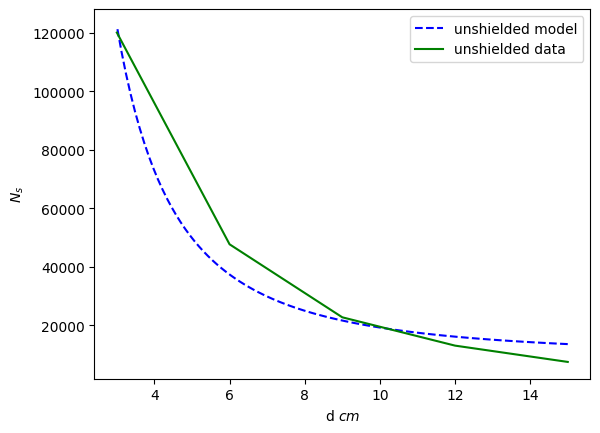

In [ ]:
#II Modeling Unshielded Cesium Data    

particles_through_point = cs_137_unshielded_df["S_(s^(-1))"]

def unshielded_model_func(x, N_s,c): #x values are distance; N_s is the value we record from the gieger counter for N_s; dependent var is N_s 
  #the number of particles traversing through the point at the edge of the spere (the Gieger counter )
  return N_s/(4*np.pi*(x**2)) + c  #need an uncertainty  -> can extract from model or obtain via propagation of error;  

uncertainty_on_d = 0.005
model_cs_137_unshielded = lm.models.Model(unshielded_model_func) 
model_cs_137_unshielded.set_param_hint("N_s", value = 100000, min = 10000) 
model_cs_137_unshielded.set_param_hint("c", value = 9000, max = 10000)
my_params_cs_137_unshielded = model_cs_137_unshielded.make_params() 
 
model_cs_137_unshielded_fit_result = model_cs_137_unshielded.fit(data = cs_137_unshielded_df["N_s"].to_numpy(), x = cs_137_unshielded_df["d_0_(cm)"].to_numpy(), params = my_params_cs_137_unshielded) 
y_vals_model_cs_137_unshielded = model_cs_137_unshielded_fit_result.eval(x = cs_137_unshielded_df["d_0_(cm)"].to_numpy())     
print(f"model values are {y_vals_model_cs_137_unshielded}")  

y_vals_model_cs_137_unshielded_linspace = np.linspace(y_vals_model_cs_137_unshielded[0], y_vals_model_cs_137_unshielded[-1], 100)  
x_vals_linspace_unshielded = np.linspace(cs_137_unshielded_df["d_0_(cm)"].to_numpy()[0], cs_137_unshielded_df["d_0_(cm)"].to_numpy()[-1], 100)
new_y_vals_model_with_x_vals_linspace_unshielded = model_cs_137_unshielded_fit_result.eval(x= x_vals_linspace_unshielded) 
print(model_cs_137_unshielded_fit_result.fit_report())

plt.plot(x_vals_linspace_unshielded, new_y_vals_model_with_x_vals_linspace_unshielded, color = "blue", linestyle = "--")  #model
plt.plot(cs_137_unshielded_df["d_0_(cm)"].to_numpy(), cs_137_unshielded_df["N_s"].to_numpy(),color = "green") #data 
plt.ylabel("$N_s$") 
plt.xlabel(r"d $cm$")
plt.legend(["unshielded model", "unshielded data"])

#NOTE POLYNOMIAL DEGREE 4 FIT LOOKS AMAZING IN EXCEL

##PART 2: Comparing mass attenuation ($\frac{\mu}{\rho}$) values for unknown blocking substance to accepted values using an exponential model



In [ ]:
#I: reading in the data 
file_names = [file for file in glob.glob("/content/drive/MyDrive/Sprague | 231/L_5/L5_data/p1/*csv") if "Shielded" in file] 
cs_137_shielded_df = pd.read_csv(file_names[0]) 
co_60_shielded_df = pd.read_csv(file_names[1]) 

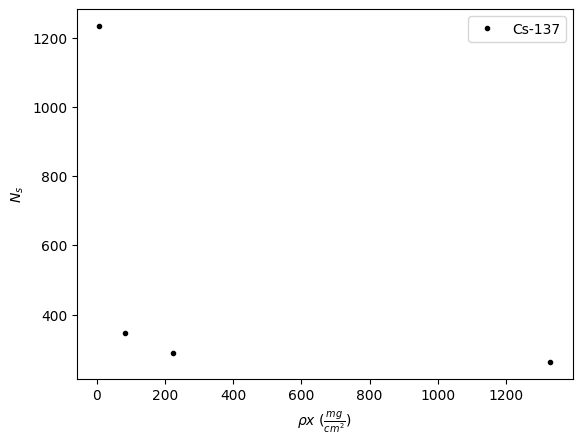

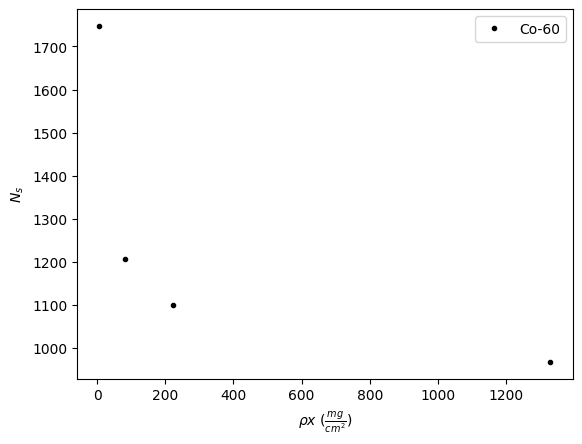

In [ ]:
#II: Taking a look at the data 
def rhox_and_N_S_plotter(df, isotope_names: list, unshielded = True): 
  plt.figure() 
  plt.errorbar(x = np.array(df["rhox_(mg_cm^(-2))"]), y = df["N_s"], fmt = ".", color = "black") #rho_x conv to m and xerr in m 
  plt.ylabel(r"$N_s$")
  plt.xlabel(r"$\rho x$ ($\frac{mg}{cm^2}$)")  
  plt.legend(isotope_names)

rhox_and_N_S_plotter(cs_137_shielded_df, ["Cs-137"], unshielded = False)  
rhox_and_N_S_plotter(co_60_shielded_df, ["Co-60"], unshielded = False)

model values are [1232.98403904  348.32089366  275.65575162  275.03931568]
[[Model]]
    Model(shielded_gamma_model_cesium)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 29
    # data points      = 4
    # variables        = 3
    chi-square         = 348.195946
    reduced chi-square = 348.195946
    Akaike info crit   = 23.8658841
    Bayesian info crit = 22.0247672
    R-squared          = 0.99947018
[[Variables]]
    N_0:          1210.48748 +/- 38.1268529 (3.15%) (init = 22720)
    mu_over_rho:  0.03391136 +/- 0.00406501 (11.99%) (init = 0.075)
    c:            275.039316 +/- 13.3481157 (4.85%) (init = 262)
[[Correlations]] (unreported correlations are < 0.100)
    C(N_0, mu_over_rho) = +0.6823
    C(mu_over_rho, c)   = +0.5599
2565
model values are [1932.01245901 1029.63648812 1029.17553495 1029.1755346 ]
[[Model]]
    Model(shielded_gamma_model_cobalt)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 91
    # data point

'\nrho_aluminum = 2.7 #g/cm^3 \nmu_over_aluminum_low_val_model = mu_over_rho_from_cesium_model - 0.00406494 \nmu_model = mu_over_rho_from_cesium_model*1000 * rho_aluminum   \nmu_low_model = mu_over_aluminum_low_val_model * rho_aluminum \nprint(mu_model) #result is 0.09 #closest to aluminum when multiplying by densities of other common metals \nprint(mu_low_model) #even low end result is to high \n'

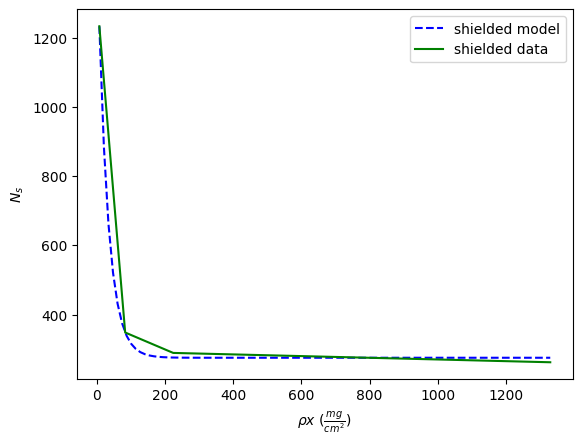

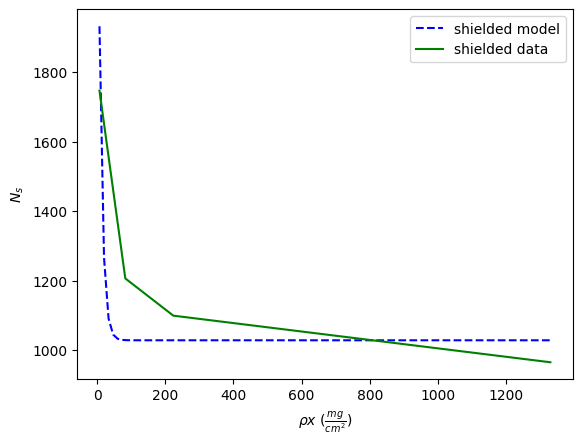

In [ ]:
#III: Creating a model for the shielded data  

def shielded_gamma_model_cesium(x, N_0, mu_over_rho, c):   
  return N_0*np.exp(-mu_over_rho*x) + c #rho_x = x
def shielded_gamma_model_cobalt(x, N, mu_over_rho_1, mu_over_rho_2, c): 
  return N*(np.exp(-mu_over_rho_1 * x) + np.exp(-mu_over_rho_2 * x)) + c

##MODEL 1!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

#model for shielded cesium-137 
model_cs_137_shielded = lm.models.Model(shielded_gamma_model_cesium) 
model_cs_137_shielded.set_param_hint("mu_over_rho", value = 0.075, min = 0.01, max = 0.2) #Wes said val = 0.2
model_cs_137_shielded.set_param_hint("N_0", value = cs_137_unshielded_df["N_s"].to_numpy()[2], min = 700, max = 23000)  #N_s unshielded is 22720 
model_cs_137_shielded.set_param_hint("c", value = 262)
my_params_cs_137_shielded = model_cs_137_shielded.make_params() 
#print(f'N_s shielded  array is {cs_137_shielded_df["N_s"].to_numpy()}')
#print(f'rho_x values are {cs_137_shielded_df["rhox_(mg_cm^(-2))"].to_numpy()}')
model_cs_137_shielded_fit_result = model_cs_137_shielded.fit(data = cs_137_shielded_df["N_s"].to_numpy(), x = cs_137_shielded_df["rhox_(mg_cm^(-2))"].to_numpy(), params = my_params_cs_137_shielded) 
y_vals_model_cs_137_shielded = model_cs_137_shielded_fit_result.eval(x = cs_137_shielded_df["rhox_(mg_cm^(-2))"].to_numpy())     
print(f"model values are {y_vals_model_cs_137_shielded}") 

y_vals_model_cs_137_shielded_linspace = np.linspace(y_vals_model_cs_137_shielded[0], y_vals_model_cs_137_shielded[-1], 100)  
x_vals_linspace = np.linspace(cs_137_shielded_df["rhox_(mg_cm^(-2))"].to_numpy()[0], cs_137_shielded_df["rhox_(mg_cm^(-2))"].to_numpy()[-1], 100)
new_y_vals_model_with_x_vals_linspace = model_cs_137_shielded_fit_result.eval(x= x_vals_linspace) 
print(model_cs_137_shielded_fit_result.fit_report())

plt.plot(x_vals_linspace, new_y_vals_model_with_x_vals_linspace, color = "blue", linestyle = "--")  #model
plt.plot(cs_137_shielded_df["rhox_(mg_cm^(-2))"].to_numpy(), cs_137_shielded_df["N_s"].to_numpy(),color = "green") #data 
plt.legend(["shielded model", "shielded data"]) 
plt.ylabel(r"$N_s$")
plt.xlabel(r"$\rho x$ ($\frac{mg}{cm^2}$)")  

#MODEL 2!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

#model for shielded cobalt-60
print(co_60_unshielded_df["N_s"].to_numpy()[0])
model_Co_60_shielded = lm.models.Model(shielded_gamma_model_cobalt) 
model_Co_60_shielded.set_param_hint("mu_over_rho_1", value = 0.07433, min = 0.02, max = 0.1) #Wes said val = 0.2 
model_Co_60_shielded.set_param_hint("mu_over_rho_2", value = 0.0525, min = 0.02, max = 0.1) #Wes said val = 0.2
model_Co_60_shielded.set_param_hint("N", value = co_60_unshielded_df["N_s"].to_numpy()[0], min = 900, max = 32688)  
#model_Co_60_shielded.set_param_hint("N2", value = co_60_unshielded_df["N_s"].to_numpy()[0], min = 700, max = 23000) 
model_Co_60_shielded.set_param_hint("c", value = 966)  


my_params_Co_60_shielded = model_Co_60_shielded.make_params() 
#print(f'N_s shielded  array is {cs_137_shielded_df["N_s"].to_numpy()}')
#print(f'rho_x values are {cs_137_shielded_df["rhox_(mg_cm^(-2))"].to_numpy()}')
model_Co_60_shielded_fit_result = model_Co_60_shielded.fit(data = co_60_shielded_df["N_s"].to_numpy(), x = co_60_shielded_df["rhox_(mg_cm^(-2))"].to_numpy(), params = my_params_Co_60_shielded) 

y_vals_model_Co_60_shielded = model_Co_60_shielded_fit_result.eval(x = co_60_shielded_df["rhox_(mg_cm^(-2))"].to_numpy())     
print(f"model values are {y_vals_model_Co_60_shielded}") 

y_vals_model_Co_60_shielded_linspace = np.linspace(y_vals_model_Co_60_shielded[0], y_vals_model_Co_60_shielded[-1], 100)  
x_vals_linspace_Co_60 = np.linspace(co_60_shielded_df["rhox_(mg_cm^(-2))"].to_numpy()[0], co_60_shielded_df["rhox_(mg_cm^(-2))"].to_numpy()[-1], 100)
new_y_vals_model_with_x_vals_linspace_Co_60 =  model_Co_60_shielded_fit_result .eval(x= x_vals_linspace_Co_60) 
print(model_Co_60_shielded_fit_result .fit_report())

plt.figure()
plt.plot(x_vals_linspace_Co_60, new_y_vals_model_with_x_vals_linspace_Co_60, color = "blue", linestyle = "--")  #model
plt.plot(co_60_shielded_df["rhox_(mg_cm^(-2))"].to_numpy(), co_60_shielded_df["N_s"].to_numpy(),color = "green") #data 
plt.legend(["shielded model", "shielded data"])
plt.ylabel(r"$N_s$")
plt.xlabel(r"$\rho x$ ($\frac{mg}{cm^2}$)")  

#CALCULATING MU
mu_over_rho_from_cesium_model = 0.03391135 #cm^-1 \ (mg\cm^3) = cm^2 / mg
mu_over_rho_from_cesium_model_converted = 0.03391123   
print(0.07433*1000)
print(mu_over_rho_from_cesium_model_converted)
'''
rho_aluminum = 2.7 #g/cm^3 
mu_over_aluminum_low_val_model = mu_over_rho_from_cesium_model - 0.00406494 
mu_model = mu_over_rho_from_cesium_model*1000 * rho_aluminum   
mu_low_model = mu_over_aluminum_low_val_model * rho_aluminum 
print(mu_model) #result is 0.09 #closest to aluminum when multiplying by densities of other common metals 
print(mu_low_model) #even low end result is to high 
'''

##PART 2: Identifying the Unknown Substance

In [ ]:
#I Reading in the data: 

full_file_list = glob.glob("/content/drive/MyDrive/Sprague | 231/L_5/L5_data/p2/*txt") 

#Background = None #QUESTION: How is background info useful? 

for file in full_file_list: 
  if "Eu_152" in file:  
    Eu_152_df = pd.read_csv(file, header = None, names = ["count"])
  elif "Cd_109" in file:  
    Cd_109_df = pd.read_csv(file, header = None, names = ["count"])
  elif "Co_57" in file:  
    Co_57_df = pd.read_csv(file, header = None, names = ["count"]) 
  elif "Unknown" in file:  
    Unknown_df = pd.read_csv(file, header = None, names = ["count"])
  elif "Cs-137" in file:  
    Cs_137_df = pd.read_csv(file, header = None, names = ["count"]) 
  elif "Co_60" in file:  
    Co_60_df = pd.read_csv(file, header = None, names = ["count"]) 
  elif "Ba_133" in file:  
    Ba_133_df = pd.read_csv(file, header = None, names = ["count"]) 
  elif "Na_22" in file:  
    Na_22_df = pd.read_csv(file, header = None, names = ["count"])   
  if "Background" in file: 
    Background_df = pd.read_csv(file, header = None, names = ["count"])

df_list_sans_unknown = [Eu_152_df, Cd_109_df, Co_57_df, Cs_137_df, Co_60_df, Ba_133_df,Na_22_df] 
df_list_sans_unknown_names = [["Eu_152_df"], ["Cd_109_df"], ["Co_57_df"], ["Cs_137_df"], ["Co_60_df"], ["Ba_133_df"],["Na_22_df"]] 



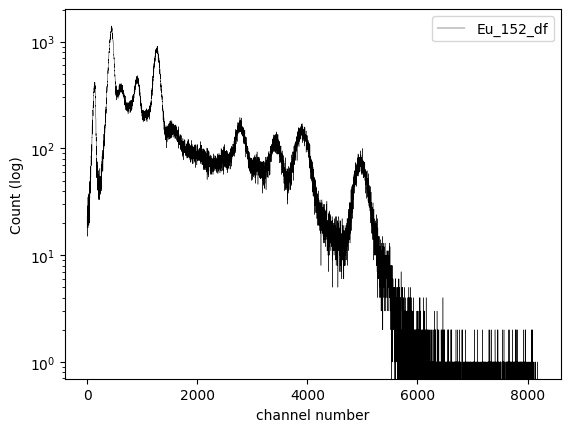

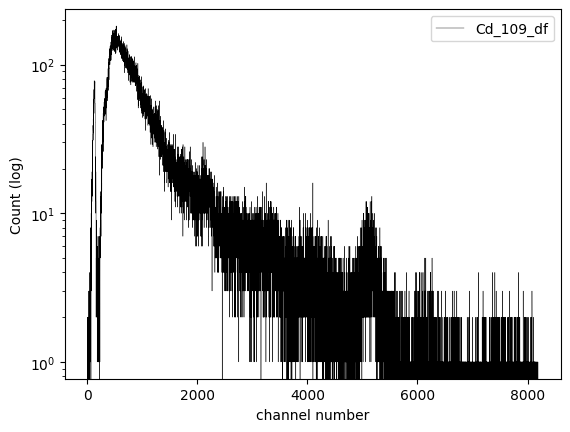

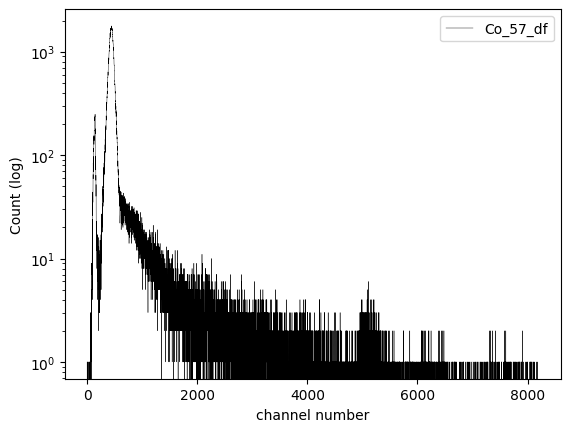

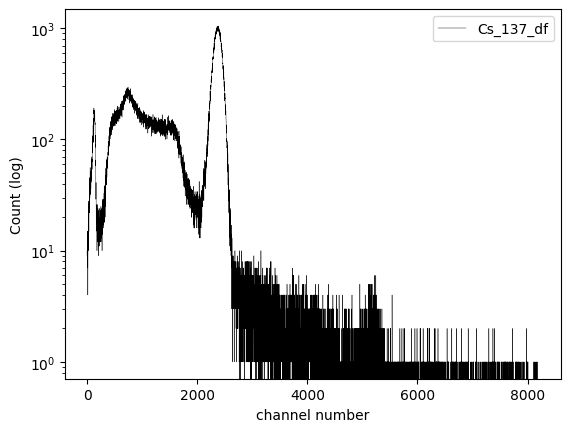

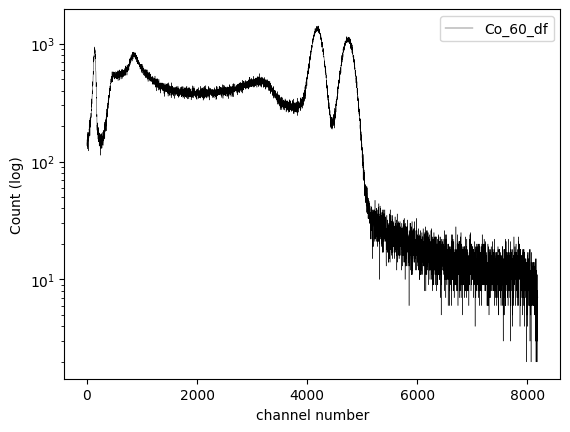

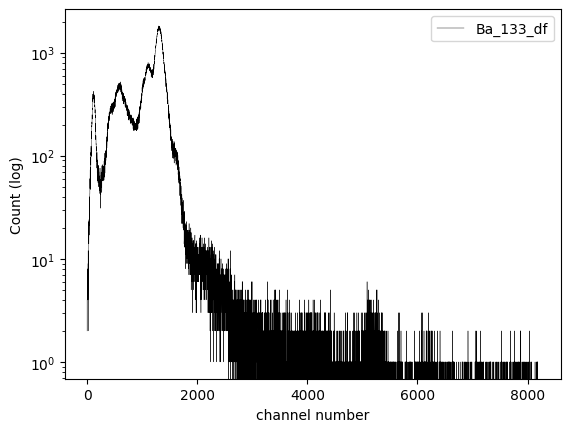

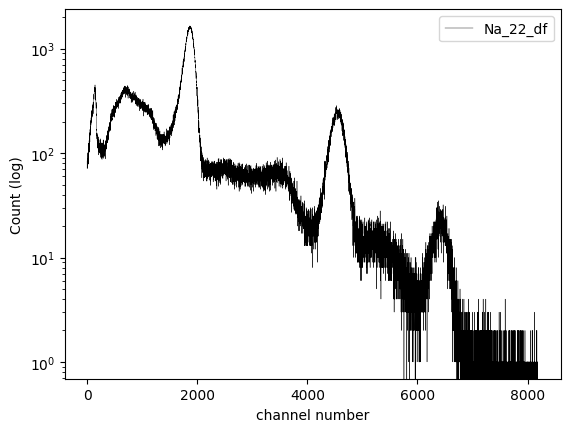

In [ ]:
##II. looking at the data to see which isotopes are going to be useful (i.e have clearly defined Gaussians) 

for i in range(len(df_list_sans_unknown)):  
  plt.figure()
  plt.yscale("log")  
  plt.step(y = df_list_sans_unknown[i]["count"], x = df_list_sans_unknown[i]["count"].index, linewidth = 0.3, color = "black")   
  plt.xlabel("channel number") 
  plt.ylabel("Count (log)") 
  plt.legend(df_list_sans_unknown_names[i][0::])
  #flip x and y axes


#Plot observations: 
**Eu 152** <br>

For Eu-152, we have primary gamma emission at (link: https://
colab.research.google.com/drive/1wkQ-d01uxZDRYl8UOwBVPfj8WRUQmtzp#scrollTo=Kh8jEfiuP8iP) 
121.7817 Kev, 344.2785 Kev, and 1408 Kev  

We should truncate at: 
0-2000 to get first four peaks 
2000-6000 to get last four peaks  

However, this data is quite noisy,so we will ignore it for now. 

**Cd 109** <br>
Cd 109 data is garbage; a Gaussian can not be observed 

**Co 57** <br>
Truncate between 0-2000 to get first peak <br>
Energy emission at: 122 Kev <br>
Source: https://www.sciencedirect.com/topics/nursing-and-health-professions/cobalt-57#:~:text=For%20example%2C%2057Co%20(E,E%CE%B3%20%3D%20140%20keV). <br>

**Cs 137** <br> 
Truncate between 1800 and 4000 to get peak <br>  
Energy emission at: 662 Kev (Source: Wesley)

**Co 60** <br>  
Truncate between 3800 and 5500 to get peak <br>
Energy emission at: 1.17 Mev => 1170 Kev (Source: Wesley) <br>

**Ba 133** <br> 
Ignore this data for now; it is quite bad <br>

**Na 22** <br>
Truncate between 1000 and 3000 to get first peak and between 3000 and 5000 to get second peak <br>
Energy peaks at 511 Mev = 511000 Kev and 1.275 Mev = 1275 Kev 













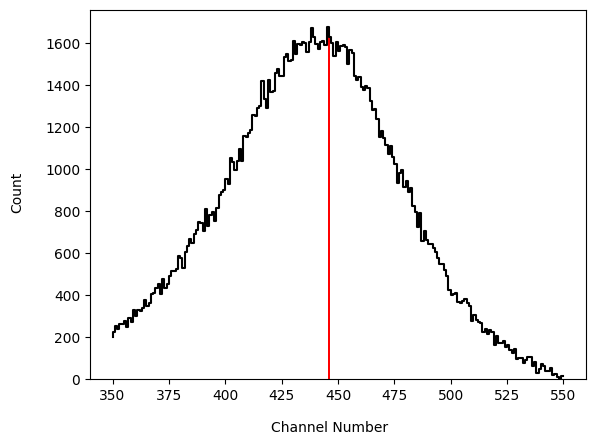

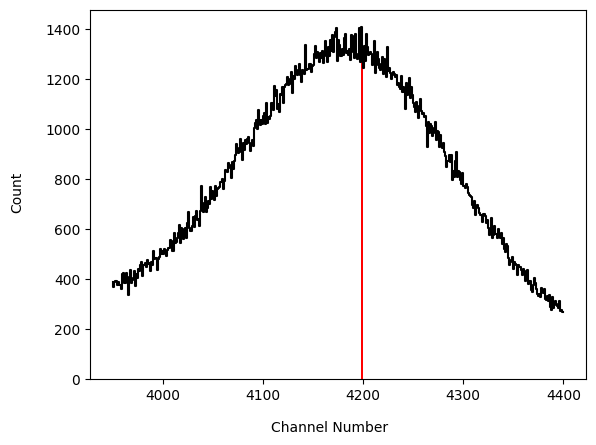

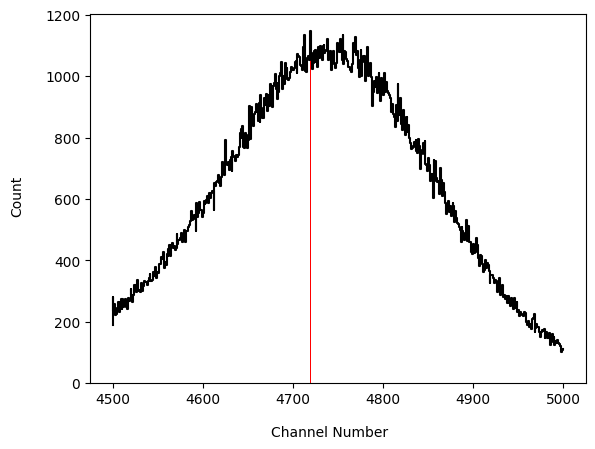

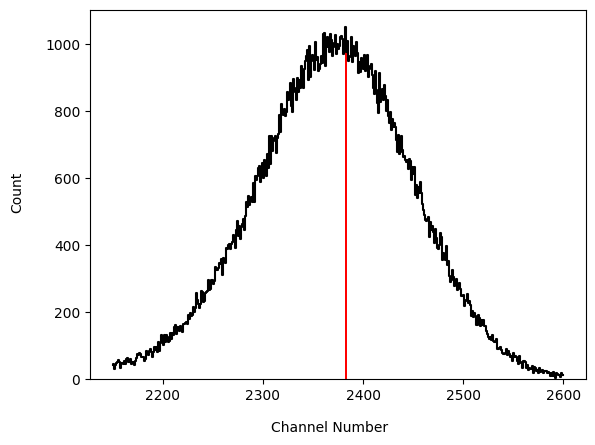

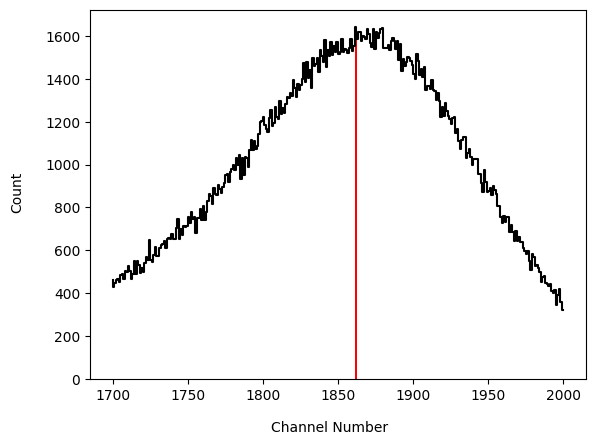

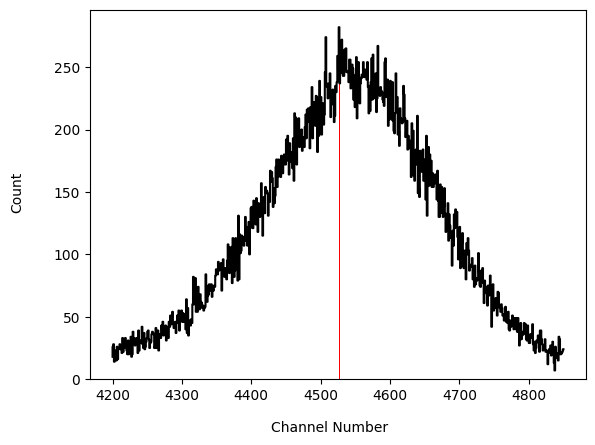

In [ ]:
#III truncating data  
revised_df_list = [Co_57_df, Cs_137_df, Co_60_df, Na_22_df]    

def truncation_func(df: "Pandas.DataFrame", start: int, stop:int):  
  #start is the start channel value (aka the df index) that we want to start truncating at 
  #stop is the stop channel value (aka the df index) that we want to stop truncating at  
  #we are also subtracting out the background counts for the given range 
  background_counts_df = Background_df.truncate(start, stop)  
  all_counts_df = full_df = df.truncate(start, stop)
  background_subtracted_truncated_array = np.abs(all_counts_df["count"].to_numpy() - background_counts_df["count"].to_numpy()) 
  new_dict = {"index": background_counts_df.index.values, "count": background_subtracted_truncated_array}  
  new_df = pd.DataFrame(new_dict, index = new_dict["index"])
  return new_df


def truncated_plotter(df: "Pandas.DataFrame", mu: int):  
    
    fig, ax = plt.subplots() 
    #print(df["count"].to_numpy())
    #ax.bar(height = df["count"], x = df["count"].index, color = "black", width = 1.2)  
    ax.step(y = df["count"], x = df["count"].index, color = "black")
    ax.bar(x = mu, height = np.max(df["count"].to_numpy()), color = "red", width = 1.2)  
    fig.text(0.5, 0, "Channel Number", ha='center', fontsize = 10) #create an axes title (x)
    fig.text(0, 0.5, "Count", va='center', rotation='vertical', fontsize = 10) 

def peak_indeces_func(df: "Pandas.DataFrame"):
  return signal.find_peaks(np.array(df["count"]))[0]  

def single_peak_index_func(df, peak_vals, offset):  
  #peak_vals_w_offset = peak_vals + 250  
  return df["count"].iloc[peak_vals].idxmax()

################################ CO 57 #####################################
Co_57_peak_1_df = truncation_func(Co_57_df, 350, 550)   
peak_vals_Co_57 = peak_indeces_func(Co_57_peak_1_df)  
mu_Co_57 = single_peak_index_func(Co_57_peak_1_df, peak_vals_Co_57, 350) 
truncated_plotter(Co_57_peak_1_df, [mu_Co_57]) 
#print("hi")
################################ Co 60 Peak 1 ###################################
Co_60_peak_1_df = truncation_func(Co_60_df, 3950, 4400)   
peak_vals_Co_60_1 = peak_indeces_func(Co_60_peak_1_df)   
mu_Co_60_1 = single_peak_index_func(Co_60_peak_1_df, peak_vals_Co_60_1, 3950) 
truncated_plotter(Co_60_peak_1_df, [mu_Co_60_1])   
#print("hi")
################################# Co 60 Peak 2 ###################################
Co_60_peak_2_df = truncation_func(Co_60_df, 4500, 5000)   
peak_vals_Co_60_2 = peak_indeces_func(Co_60_peak_2_df)   
mu_Co_60_2 = single_peak_index_func(Co_60_peak_2_df, peak_vals_Co_60_2, 4500) 
truncated_plotter(Co_60_peak_2_df, [mu_Co_60_2]) 

################################# Cs 137 ###########################################
Cs_137_peak_1_df = truncation_func(Cs_137_df, 2150, 2600) 
peak_vals_Cs_137 = peak_indeces_func(Cs_137_peak_1_df)   
mu_Cs_137 = single_peak_index_func(Cs_137_peak_1_df, peak_vals_Cs_137, 2150) 
truncated_plotter(Cs_137_peak_1_df, [mu_Cs_137]) 

################################### Na 22 Peak 1#################################
Na_22_peak_1_df = truncation_func(Na_22_df, 1700, 2000)
peak_vals_Na_22_1 = peak_indeces_func(Na_22_peak_1_df)   
mu_Na_22_1 = single_peak_index_func(Na_22_peak_1_df, peak_vals_Na_22_1, 2000) 
truncated_plotter(Na_22_peak_1_df, [mu_Na_22_1]) 

############################### Na 22 Peak 2#######################################
Na_22_peak_2_df = truncation_func(Na_22_df, 4200, 4850)
peak_vals_Na_22_2 = peak_indeces_func(Na_22_peak_2_df)   
mu_Na_22_2 = single_peak_index_func(Na_22_peak_2_df, peak_vals_Na_22_2, 4200) 
truncated_plotter(Na_22_peak_2_df, mu_Na_22_2) 


[47, 134]
Fit report for Co_57 peak 1 [[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 41
    # data points      = 201
    # variables        = 4
    chi-square         = 478005.937
    reduced chi-square = 2426.42608
    Akaike info crit   = 1570.58878
    Bayesian info crit = 1583.80200
    R-squared          = 0.99149500
[[Variables]]
    amp:  1554.07980 +/- 11.5964479 (0.75%) (init = 1674)
    cen:  439.434760 +/- 0.20895771 (0.05%) (init = 446)
    wid:  38.1889059 +/- 0.40601604 (1.06%) (init = 10)
    C:    48.3972740 +/- 11.4118800 (23.58%) (init = 200)
[[Correlations]] (unreported correlations are < 0.100)
    C(wid, C)   = -0.8531
    C(amp, C)   = -0.7725
    C(amp, wid) = +0.4662


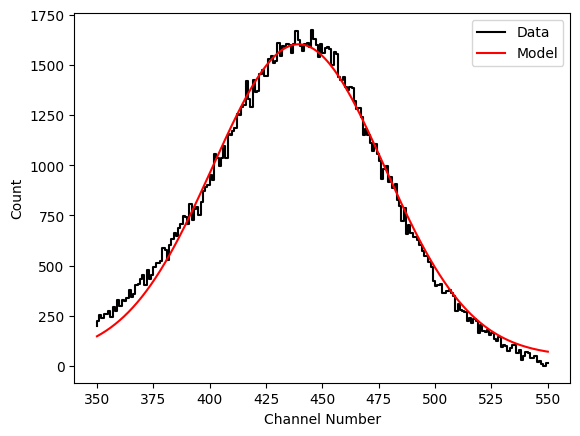

In [ ]:
#IV Modeling Channel Data:  

def get_width(truncated_df: "Pandas.DataFrame", mu: int) -> float: 
  count_midpoint = int(truncated_df.at[mu, "count"]/2)  
  count_arr = truncated_df["count"].to_numpy()
  y_values = [] #the y values corresponding the the ymax/2 points that we identify within the count_arr
  
  closest_1 = count_arr[0]
  closest_2 = count_arr[-1]
  for i in range(0,int(len(count_arr)/2),1):  
    #print(i)
    if count_arr[i] > closest_1 and count_arr[i] <= count_midpoint:
      closest_1 = count_arr[i]
  y_values.append(closest_1)  

  for i in range(int(len(count_arr)/2),len(count_arr), 1):
    if count_arr[i] > closest_2 and count_arr[i] <= count_midpoint:
      closest_2 = count_arr[i]
  y_values.append(closest_2) 

  x_values = [] 
  for i in range(len(count_arr)): 
    if count_arr[i] == y_values[0] or count_arr[i] == y_values[1]: 
      x_values.append(i)  

  #if len(x_values) > 2: 
  #  print("error!!!!! ASSUMPTION MADE") 
  
  print(x_values)

  x_1 = x_values[0] 
  x_2 = x_values[-1] 
  #THE ASSUMPTION: BY TAKING 0 and -1 WE ARE MAKING AN ASSUMPTION THAT THE FWHM x values occur at the widest points on our curve, meaning 
  #we are potenially slightly less than the x-values at FWHM y-values

  FWHM = np.abs(x_2 - x_1)
  #print(FWHM)
  sigma = FWHM/2.355  
  width = 2*(sigma**2) 
  #print(width)
  return width 

Co_57_width_est = get_width(Co_57_peak_1_df, mu_Co_57)

################### Co 57 ############################
def gaussian(x, amp, cen, wid, C):
     return amp * np.exp(-(x-cen)**2 / (2 * wid * wid)) + C 

model_Co_57 = lm.models.Model(gaussian)  
#model_Co_57.set_param_hint("amp", value = np.max(Co_57_peak_1_df["count"].to_numpy())) 
#print(np.max(Co_57_peak_1_df["count"].to_numpy()))
model_Co_57.set_param_hint("amp", value = np.max(Co_57_peak_1_df["count"].to_numpy()))   
model_Co_57.set_param_hint("cen", value = mu_Co_57) 
model_Co_57.set_param_hint("wid", value = 10)
model_Co_57.set_param_hint("C", value = 200)
my_params_Co_57 = model_Co_57.make_params() 

model_Co_57_fit_result = model_Co_57.fit(data = Co_57_peak_1_df["count"], x = Co_57_peak_1_df.index.values, params = my_params_Co_57)
y_vals_Co_57_model = model_Co_57_fit_result.eval(x = Co_57_peak_1_df.index.values)  
print(f"Fit report for Co_57 peak 1 {model_Co_57_fit_result.fit_report()}")

plt.step(y = Co_57_peak_1_df["count"], x = Co_57_peak_1_df["count"].index, color = "black")  
plt.plot(Co_57_peak_1_df.index.values, y_vals_Co_57_model, color = "red")  
plt.xlabel("Channel Number") 
plt.ylabel("Count") 
plt.legend(["Data", "Model"])


Fit report for Co 60 peak 1 [[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 41
    # data points      = 451
    # variables        = 4
    chi-square         = 631832.311
    reduced chi-square = 1413.49510
    Akaike info crit   = 3275.45530
    Bayesian info crit = 3291.90117
    R-squared          = 0.98798913
[[Variables]]
    amp:  1110.60442 +/- 9.94288324 (0.90%) (init = 1409)
    cen:  4178.32722 +/- 0.37170460 (0.01%) (init = 4199)
    wid:  104.150741 +/- 1.15104812 (1.11%) (init = 150)
    C:    220.771032 +/- 10.8938165 (4.93%) (init = 180)
[[Correlations]] (unreported correlations are < 0.100)
    C(wid, C)   = -0.9405
    C(amp, C)   = -0.9383
    C(amp, wid) = +0.8128
------------------------------------------------------------------------
Fit report for Co_60 peak 2 [[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 31
    # data points      = 501
    # var

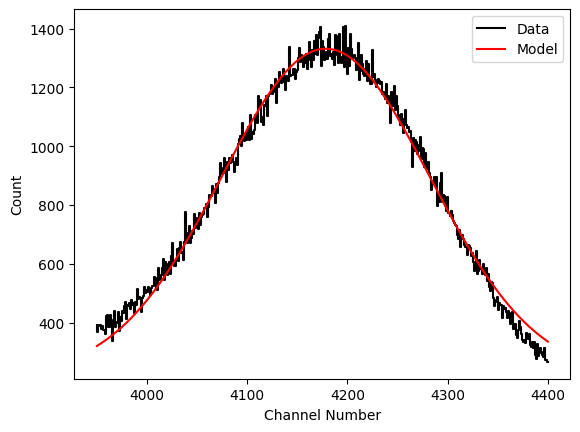

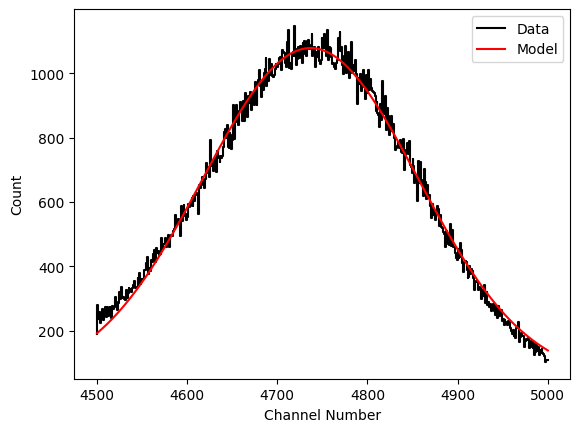

In [ ]:
############################# Co 60 peak 1 ##################################### 

model_Co_60_peak_1 = lm.models.Model(gaussian)  
#model_Co_57.set_param_hint("amp", value = np.max(Co_57_peak_1_df["count"].to_numpy())) 
#print(np.max(Co_57_peak_1_df["count"].to_numpy()))
model_Co_60_peak_1.set_param_hint("amp", value = np.max(Co_60_peak_1_df["count"].to_numpy()))   
model_Co_60_peak_1.set_param_hint("cen", value = mu_Co_60_1) 
model_Co_60_peak_1.set_param_hint("wid", value = 150)
model_Co_60_peak_1.set_param_hint("C", value = 180)
my_params_Co_60_peak_1 = model_Co_60_peak_1.make_params() 

model_Co_60_peak_1_fit_result = model_Co_60_peak_1.fit(data = Co_60_peak_1_df["count"], x = Co_60_peak_1_df.index.values, params = my_params_Co_60_peak_1)
y_vals_Co_60_peak_1 = model_Co_60_peak_1_fit_result.eval(x = Co_60_peak_1_df.index.values)  
print(f"Fit report for Co 60 peak 1 {model_Co_60_peak_1_fit_result.fit_report()}")

plt.step(y = Co_60_peak_1_df["count"], x = Co_60_peak_1_df["count"].index, color = "black")   
plt.plot(Co_60_peak_1_df.index.values, y_vals_Co_60_peak_1, color = "red") 
plt.xlabel("Channel Number") 
plt.ylabel("Count") 
plt.legend(["Data", "Model"])

print("------------------------------------------------------------------------")
############################# Co 60 peak 2 ##################################### 

model_Co_60_peak_2 = lm.models.Model(gaussian)  
#model_Co_57.set_param_hint("amp", value = np.max(Co_57_peak_1_df["count"].to_numpy())) 
#print(np.max(Co_57_peak_1_df["count"].to_numpy()))
model_Co_60_peak_2.set_param_hint("amp", value = np.max(Co_60_peak_2_df["count"].to_numpy()))   
model_Co_60_peak_2.set_param_hint("cen", value = mu_Co_60_2) 
model_Co_60_peak_2.set_param_hint("wid", value = 150)
model_Co_60_peak_2.set_param_hint("C", value = 180)
my_params_Co_60_peak_2 = model_Co_60_peak_2.make_params() 

model_Co_60_peak_2_fit_result = model_Co_60_peak_2.fit(data = Co_60_peak_2_df["count"], x = Co_60_peak_2_df.index.values, params = my_params_Co_60_peak_2)
y_vals_Co_60_peak_2 = model_Co_60_peak_2_fit_result.eval(x = Co_60_peak_2_df.index.values)  
print(f"Fit report for Co_60 peak 2 {model_Co_60_peak_2_fit_result.fit_report()}")

plt.figure()
plt.step(y = Co_60_peak_2_df["count"], x = Co_60_peak_2_df["count"].index, color = "black")    
plt.plot(Co_60_peak_2_df.index.values, y_vals_Co_60_peak_2, color = "red") 
plt.xlabel("Channel Number") 
plt.ylabel("Count") 
plt.legend(["Data", "Model"])


Fit report for Cs 137 peak 1 [[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 26
    # data points      = 451
    # variables        = 4
    chi-square         = 249458.996
    reduced chi-square = 558.073816
    Akaike info crit   = 2856.32771
    Bayesian info crit = 2872.77357
    R-squared          = 0.99528708
[[Variables]]
    amp:  981.519493 +/- 3.32870256 (0.34%) (init = 1049)
    cen:  2372.86614 +/- 0.22313122 (0.01%) (init = 2383)
    wid:  76.1258660 +/- 0.37984048 (0.50%) (init = 69)
    C:    15.3312583 +/- 2.96808872 (19.36%) (init = 10)
[[Correlations]] (unreported correlations are < 0.100)
    C(wid, C)   = -0.8083
    C(amp, C)   = -0.6628
    C(amp, wid) = +0.2810


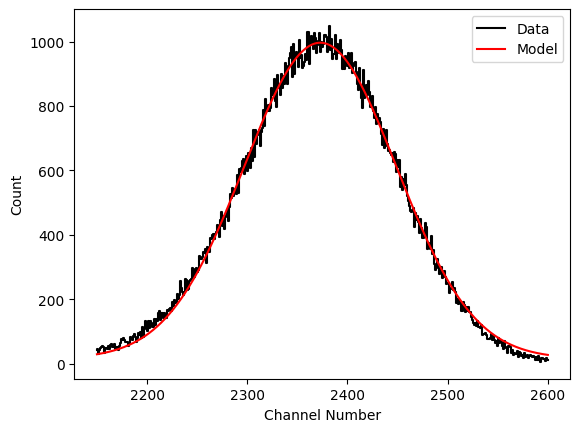

In [ ]:
############################### Cs 137 Peak 1 ################################################# 

model_Cs_137_peak_1 = lm.models.Model(gaussian)  
#model_Co_57.set_param_hint("amp", value = np.max(Co_57_peak_1_df["count"].to_numpy())) 
#print(np.max(Co_57_peak_1_df["count"].to_numpy()))
model_Cs_137_peak_1.set_param_hint("amp", value = np.max(Cs_137_peak_1_df["count"].to_numpy()))   
model_Cs_137_peak_1.set_param_hint("cen", value = mu_Cs_137) 
model_Cs_137_peak_1.set_param_hint("wid", value = 69)
model_Cs_137_peak_1.set_param_hint("C", value = 10)
my_params_Cs_137_peak_1 = model_Cs_137_peak_1.make_params() 

model_Cs_137_peak_1_fit_result = model_Cs_137_peak_1.fit(data = Cs_137_peak_1_df["count"], x = Cs_137_peak_1_df.index.values, params = my_params_Cs_137_peak_1)
y_vals_Cs_137_peak_1 = model_Cs_137_peak_1_fit_result.eval(x = Cs_137_peak_1_df.index.values)  
print(f"Fit report for Cs 137 peak 1 {model_Cs_137_peak_1_fit_result.fit_report()}")

plt.step(y = Cs_137_peak_1_df["count"], x = Cs_137_peak_1_df["count"].index, color = "black")   
plt.plot(Cs_137_peak_1_df.index.values, y_vals_Cs_137_peak_1 , color = "red")  
plt.xlabel("Channel Number")
plt.ylabel("Count") 
plt.legend(["Data", "Model"])

Fit report for Na 22 peak 1 [[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 31
    # data points      = 301
    # variables        = 4
    chi-square         = 1016392.77
    reduced chi-square = 3422.19788
    Akaike info crit   = 2453.52271
    Bayesian info crit = 2468.35115
    R-squared          = 0.97806281
[[Variables]]
    amp:  1252.24498 +/- 17.1437273 (1.37%) (init = 1640)
    cen:  1862.40430 +/- 0.41943894 (0.02%) (init = 1862)
    wid:  68.8074765 +/- 1.18104209 (1.72%) (init = 70)
    C:    341.556416 +/- 18.6031909 (5.45%) (init = 70)
[[Correlations]] (unreported correlations are < 0.100)
    C(wid, C)   = -0.9280
    C(amp, C)   = -0.9233
    C(amp, wid) = +0.7719
Fit report for Na 22 peak 2 [[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 31
    # data points      = 651
    # variables        = 4
    chi-square         = 90680.9072
    reduced chi-squar

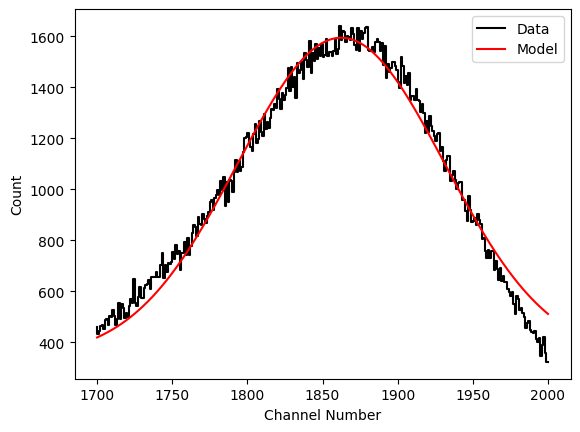

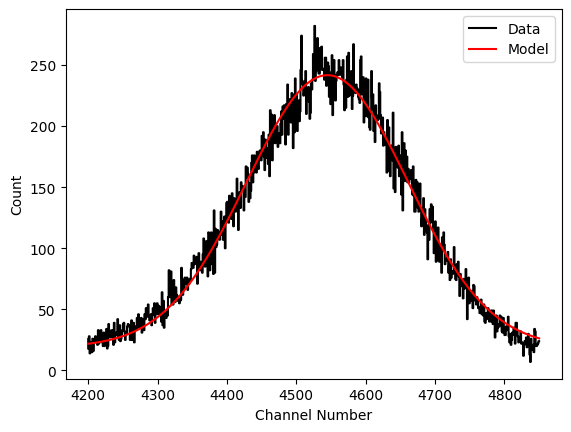

In [ ]:
################################### Na 22 Peak 1################################# 

model_Na_22_peak_1 = lm.models.Model(gaussian)  
#model_Co_57.set_param_hint("amp", value = np.max(Co_57_peak_1_df["count"].to_numpy())) 
#print(np.max(Co_57_peak_1_df["count"].to_numpy()))
model_Na_22_peak_1.set_param_hint("amp", value = np.max(Na_22_peak_1_df["count"].to_numpy()))   
model_Na_22_peak_1.set_param_hint("cen", value = mu_Na_22_1) 
model_Na_22_peak_1.set_param_hint("wid", value = 70)
model_Na_22_peak_1.set_param_hint("C", value = 70)
my_params_Na_22_peak_1 = model_Na_22_peak_1.make_params() 

model_Na_22_peak_1_fit_result = model_Na_22_peak_1.fit(data = Na_22_peak_1_df["count"], x = Na_22_peak_1_df.index.values, params = my_params_Na_22_peak_1)
y_vals_Na_22_peak_1 = model_Na_22_peak_1_fit_result.eval(x = Na_22_peak_1_df.index.values)  
print(f"Fit report for Na 22 peak 1 {model_Na_22_peak_1_fit_result.fit_report()}")


plt.step(y = Na_22_peak_1_df["count"], x = Na_22_peak_1_df["count"].index, color = "black")   
plt.plot(Na_22_peak_1_df.index.values, y_vals_Na_22_peak_1 , color = "red")   
plt.xlabel("Channel Number") 
plt.ylabel("Count") 
plt.legend(["Data", "Model"])

################################### Na 22 Peak 2################################# 

model_Na_22_peak_2 = lm.models.Model(gaussian)  
#model_Co_57.set_param_hint("amp", value = np.max(Co_57_peak_1_df["count"].to_numpy())) 
#print(np.max(Co_57_peak_1_df["count"].to_numpy()))
model_Na_22_peak_2.set_param_hint("amp", value = np.max(Na_22_peak_2_df["count"].to_numpy()))   
model_Na_22_peak_2.set_param_hint("cen", value = mu_Na_22_2) 
model_Na_22_peak_2.set_param_hint("wid", value = 70)
model_Na_22_peak_2.set_param_hint("C", value = 70, max = 200)
my_params_Na_22_peak_2 = model_Na_22_peak_2.make_params() 

model_Na_22_peak_2_fit_result = model_Na_22_peak_2.fit(data = Na_22_peak_2_df["count"], x = Na_22_peak_2_df.index.values, params = my_params_Na_22_peak_2)
y_vals_Na_22_peak_2 = model_Na_22_peak_2_fit_result.eval(x = Na_22_peak_2_df.index.values)  
print(f"Fit report for Na 22 peak 2 {model_Na_22_peak_2_fit_result.fit_report()}")

plt.figure()
plt.step(y = Na_22_peak_2_df["count"], x = Na_22_peak_2_df["count"].index, color = "black")    
plt.plot(Na_22_peak_2_df.index.values, y_vals_Na_22_peak_2 , color = "red")  
plt.xlabel("Channel Number") 
plt.ylabel("Count") 
plt.legend(["Data", "Model"])

Co-57 Co-60 1 Co-60 2 Cs 137 Na 22 1 Na 22 2
[122, 1770, 1330, 662, 511, 1750]
['439.434760', '4178.32722', '4736.81224', '2372.86614', '1862.40430', '4544.78726']
regression result is LinregressResult(slope=0.3760072367039477, intercept=-112.29213948040069, rvalue=0.9439732544982343, pvalue=0.0046205604463425195, stderr=0.06572783976889021, intercept_stderr=224.251481096049)


Text(0.5, 0, 'Channel Number')

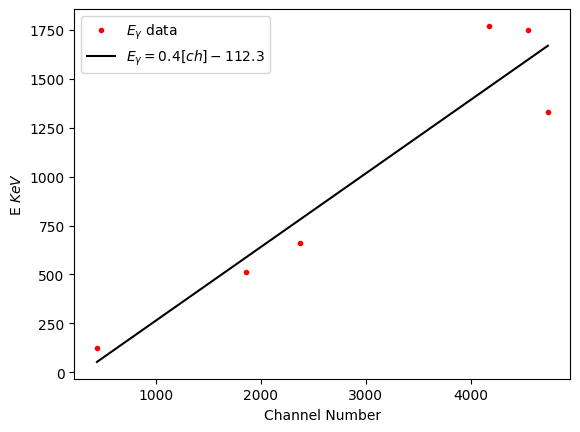

In [ ]:
Energies = [122, 1770, 1330, 662, 511, 1750] #in KeV order: Co-57, Co-60 1, Co-60 2, Cs 137, Na 22 1, Na 22, 2  #PHOTON INCIDENT ENERGIES
#Energies = [39.42781457, 1546.72920267, 1115.67328918, 477.65013624, 340.66666667, 1527.05061082] #RECOIL ELECTRON ENERGIES
df_names= ["Co-57", "Co-60 1", "Co-60 2", "Cs 137", "Na 22 1", "Na 22 2"] 
print(df_names)
print(Energies) #in sorted order: Co_57,Na 22-1, Cs 137, Na 22-2, Co-60 2, Na 22-2, Co-60 1 

Co_57_model_vals_result_strings_list = model_Co_57_fit_result.fit_report().split("\n")[13:17]  
#print(Co_57_model_vals_result_strings_list)
Co_60_peak_1_model_vals_result_strings_list = model_Co_60_peak_1_fit_result.fit_report().split("\n")[13:17]
#print(Co_60_peak_1_model_vals_result_strings_list) 
Co_60_peak_2_model_vals_result_strings_list = model_Co_60_peak_2_fit_result .fit_report().split("\n")[13:17] 
#print(Co_60_peak_2_model_vals_result_strings_list)
Cs_137_peak_1_model_vals_result_strings_list = model_Cs_137_peak_1_fit_result.fit_report().split("\n")[13:17] 
#print(Cs_137_peak_1_model_vals_result_strings_list) 
Na_22_peak_1_model_vals_result_strings_list = model_Na_22_peak_1_fit_result.fit_report().split("\n")[13:17] 
#print(Na_22_peak_1_model_vals_result_strings_list) 
Na_22_peak_2_model_vals_result_strings_list = model_Na_22_peak_2_fit_result.fit_report().split("\n")[13:17] 
#print(Na_22_peak_2_model_vals_result_strings_list) 


def center_parameter_and_uncertainty_grabber(strings_list:list) -> tuple: 
    center_data_string = strings_list[1] 
    mu_value = center_data_string.split(" ")[6]  
    #print(mu_value)
    uncertainty_value = center_data_string.split(" ")[8] 
    #print(uncertainty_value)
    return (mu_value, uncertainty_value) 


Co_57_peak_1_model_mu, Co_57_peak_1_model_mu_uncertainty =  center_parameter_and_uncertainty_grabber(Co_57_model_vals_result_strings_list)
Co_60_peak_1_model_mu, Co_60_peak_1_model_mu_uncertainty =  center_parameter_and_uncertainty_grabber(Co_60_peak_1_model_vals_result_strings_list)
Co_60_peak_2_model_mu, Co_60_peak_2_model_mu_uncertainty =  center_parameter_and_uncertainty_grabber(Co_60_peak_2_model_vals_result_strings_list) 
Cs_137_peak_1_model_mu, Cs_137_peak_1_model_mu_uncertainty = center_parameter_and_uncertainty_grabber(Cs_137_peak_1_model_vals_result_strings_list)
Na_22_peak_1_model_mu, Na_22_peak_1_model_mu_uncertainty =  center_parameter_and_uncertainty_grabber(Na_22_peak_1_model_vals_result_strings_list)
Na_22_peak_2_model_mu, Na_22_peak_2_model_mu_uncertainty =  center_parameter_and_uncertainty_grabber(Na_22_peak_2_model_vals_result_strings_list) 

mu_list = ([Co_57_peak_1_model_mu, Co_60_peak_1_model_mu, Co_60_peak_2_model_mu, Cs_137_peak_1_model_mu, Na_22_peak_1_model_mu, Na_22_peak_2_model_mu]) 
mu_list_floats = [float(mu) for mu in mu_list] 
print(mu_list) #in sorted order: Na 22-1, 
plt.plot(mu_list_floats, Energies, ".", color = "red")

regression_result = scipy.stats.linregress(mu_list_floats, y= Energies, alternative='two-sided')   
print(f"regression result is {regression_result}")
slope = regression_result.slope 
intercept = regression_result.intercept  

mu_error_vals = [0.20895769, 0.37170458, 0.34767614,  0.22313121, 0.41943893, 0.61054593]
regression_line_x_vals = np.linspace(np.sort(mu_list_floats)[0], np.sort(mu_list_floats)[-1], 100)
regression_line_y_vals = np.linspace(np.sort(mu_list_floats)[0], np.sort(mu_list_floats)[-1], 100)*slope + intercept  
plt.plot(regression_line_x_vals, regression_line_y_vals, color = "black")  
gamma_string = r"_{\gamma}"
plt.legend([r"$E_{\gamma}$ data", f"$E{gamma_string} = {np.round(slope, 1)}[ch] {np.round(intercept, 1)}$"]) 
plt.ylabel(r"E $KeV$")
plt.xlabel(r"Channel Number")

#NEED TO ADD ERROR ON ENERGIES ASSOCIATED WITH ERROR PROPAGATION

In [ ]:
#MODELING THE UNKNOWN SUBSTANCE AND FINDING ITS ENERGY 

Fit report for Unknown peak 1 [[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 26
    # data points      = 451
    # variables        = 4
    chi-square         = 315734.206
    reduced chi-square = 706.340507
    Akaike info crit   = 2962.58609
    Bayesian info crit = 2979.03196
    R-squared          = 0.99566407
[[Variables]]
    amp:  1151.19817 +/- 3.74148247 (0.33%) (init = 1312)
    cen:  2372.02916 +/- 0.21391313 (0.01%) (init = 2363)
    wid:  76.0436356 +/- 0.36352576 (0.48%) (init = 70)
    C:    90.1766602 +/- 3.33101405 (3.69%) (init = 70)
[[Correlations]] (unreported correlations are < 0.100)
    C(wid, C)   = -0.8076
    C(amp, C)   = -0.6616
    C(amp, wid) = +0.2787
Fit report for Unknown peak 2 [[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 31
    # data points      = 501
    # variables        = 4
    chi-square         = 99243.1551
    reduced chi-s

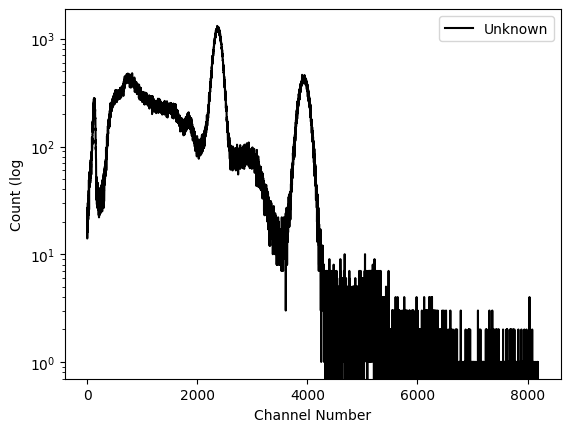

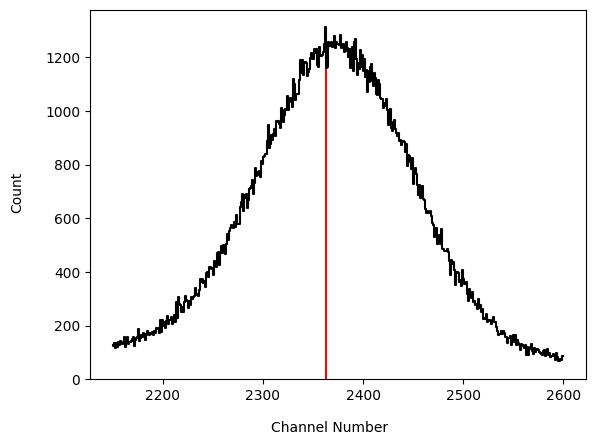

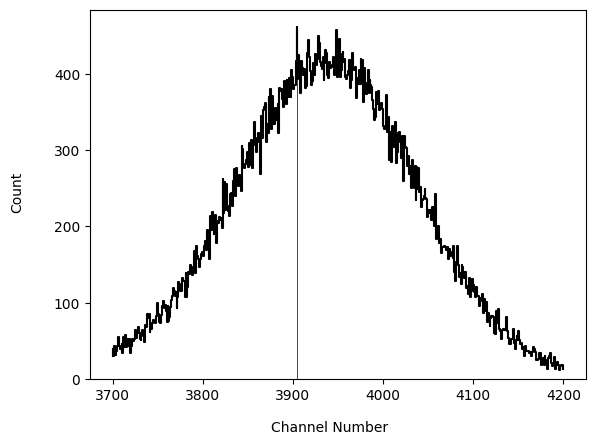

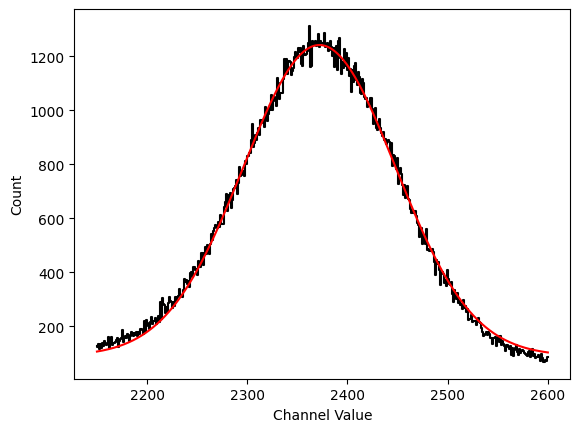

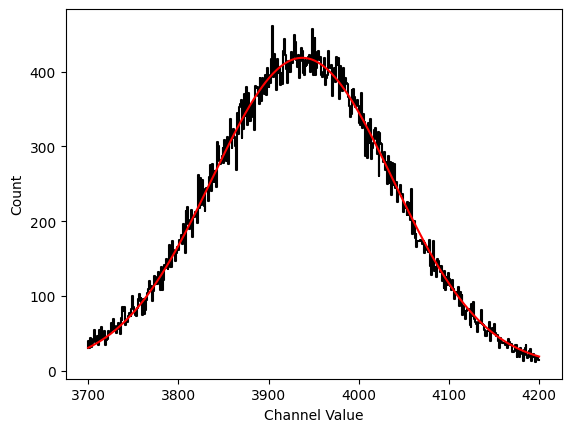

In [ ]:
plt.step(y = Unknown_df["count"], x = Unknown_df.index.values, color = "black") 
plt.xlabel("Channel Number")   
plt.yscale("log") 
plt.legend(["Unknown"])
plt.ylabel("Count (log")

#observations: two peaks: one from 2100 to 2500 and one from 3800 to 4200

#TRUNCATING UNKNOWN PEAK 1
Unknown_peak_1_df = truncation_func(Unknown_df, 2150, 2600) 
peak_vals_Unknown = peak_indeces_func(Unknown_peak_1_df)   
mu_Unknown_1 = single_peak_index_func(Unknown_peak_1_df, peak_vals_Unknown, 2150) 
truncated_plotter(Unknown_peak_1_df, [mu_Unknown_1]) 

#TRUNCATING UNKNOWN PEAK 2 

Unknown_peak_2_df = truncation_func(Unknown_df, 3700, 4200) 
peak_vals_Unknown_2 = peak_indeces_func(Unknown_peak_2_df)   
mu_Unknown_2 = single_peak_index_func(Unknown_peak_2_df, peak_vals_Unknown_2, 3700) 
truncated_plotter(Unknown_peak_2_df, [mu_Unknown_2]) 

#MODEL FOR PEAK 1: 

model_Unknown_peak_1 = lm.models.Model(gaussian)  
#model_Co_57.set_param_hint("amp", value = np.max(Co_57_peak_1_df["count"].to_numpy())) 
#print(np.max(Co_57_peak_1_df["count"].to_numpy()))
model_Unknown_peak_1.set_param_hint("amp", value = np.max(Unknown_peak_1_df["count"].to_numpy()))   
model_Unknown_peak_1.set_param_hint("cen", value = mu_Unknown_1) 
model_Unknown_peak_1.set_param_hint("wid", value = 70)
model_Unknown_peak_1.set_param_hint("C", value = 70, max = 200)
my_params_Unknown_peak_1 = model_Unknown_peak_1.make_params() 

model_Unknown_peak_1_fit_result = model_Unknown_peak_1.fit(data = Unknown_peak_1_df["count"], x = Unknown_peak_1_df.index.values, params = my_params_Unknown_peak_1)
y_vals_Unknown_peak_1 = model_Unknown_peak_1_fit_result.eval(x = Unknown_peak_1_df.index.values)  
print(f"Fit report for Unknown peak 1 {model_Unknown_peak_1_fit_result.fit_report()}")

plt.figure()

plt.step(y = Unknown_peak_1_df["count"], x = Unknown_peak_1_df["count"].index, color = "black")  
plt.plot(Unknown_peak_1_df.index.values, y_vals_Unknown_peak_1 , color = "red")  
plt.xlabel("Channel Value") 
plt.ylabel("Count")
#MODEL FOR PEAK 2:


model_Unknown_peak_2 = lm.models.Model(gaussian)  
#model_Co_57.set_param_hint("amp", value = np.max(Co_57_peak_1_df["count"].to_numpy())) 
#print(np.max(Co_57_peak_1_df["count"].to_numpy()))
model_Unknown_peak_2.set_param_hint("amp", value = np.max(Unknown_peak_2_df["count"].to_numpy()))   
model_Unknown_peak_2.set_param_hint("cen", value = mu_Unknown_2) 
model_Unknown_peak_2.set_param_hint("wid", value = 70)
model_Unknown_peak_2.set_param_hint("C", value = 70, max = 200)
my_params_Unknown_peak_2 = model_Unknown_peak_2.make_params() 

model_Unknown_peak_2_fit_result = model_Unknown_peak_2.fit(data = Unknown_peak_2_df["count"], x = Unknown_peak_2_df.index.values, params = my_params_Unknown_peak_2)
y_vals_Unknown_peak_2 = model_Unknown_peak_2_fit_result.eval(x = Unknown_peak_2_df.index.values)  
print(f"Fit report for Unknown peak 2 {model_Unknown_peak_2_fit_result.fit_report()}")

plt.figure()
plt.step(y = Unknown_peak_2_df["count"], x = Unknown_peak_2_df["count"].index, color = "black")  
plt.plot(Unknown_peak_2_df.index.values, y_vals_Unknown_peak_2 , color = "red")  
plt.xlabel("Channel Value") 
plt.ylabel("Count")

#EXTRACTING FIT REPORT PARAMETERS FOR UNKNOWN PEAKS 

Unknown_peak_1_model_vals_result_strings_list = model_Unknown_peak_1_fit_result.fit_report().split("\n")[13:17]
Unknown_peak_2_model_vals_result_strings_list = model_Unknown_peak_2_fit_result.fit_report().split("\n")[13:17] 

Unknown_peak_1_model_mu, Unknown_peak_1_model_mu_uncertainty =  center_parameter_and_uncertainty_grabber(Unknown_peak_1_model_vals_result_strings_list)
Unknown_peak_2_model_mu, Unknown_peak_2_model_mu_uncertainty =  center_parameter_and_uncertainty_grabber(Unknown_peak_2_model_vals_result_strings_list)

energy_1 = (float(Unknown_peak_1_model_mu) * slope) + intercept 
energy_2 = (float(Unknown_peak_2_model_mu) * slope) + intercept  

print(energy_1) 
print(energy_2)



###Isotope identification: 

Na-24: 
http://nucleardata.nuclear.lu.se/toi/nuclide.asp?iZA=110024
line at 1368.63 Kev   

Additional line likely just due to residual data



##PART 3: Calculating energy of the electron when it is scattered completely backward. 

To calculate the energy of the electron when it is scattered completely backward, we need derive the equation for the energy of a photon after Compton scattering has occured. To derive the equation governing the Compton effect, we begin with the diagram given in the prelab as our model. The electron is scattered at an angle $$\theta$$ while the photon is scattered at an angle $$\phi$$. The gamma ray possesses energy $$E_{\gamma} = h\nu$$ while the electron has kinetic energy T after being struck and the photon has energy $$E_{\gamma}^{\prime} = h\nu^{\prime}$$. We know that the rest energy for an electron is $$m_0 c^2$$ while the relativistic momentum of an electron p and rest energy are related by $$ (T+m_0 C^2)^2 = (pc)^2 + (m_0 c^2)^2 $$ and the momentum of the photon is $$p_{\gamma} = \frac{E_{\gamma}}{c}$$. Considering conservation of energy first, we can say that 

$$ T = E_{\gamma} - E_{\gamma}^{\prime} $$. Before moving to conservation of momentum, we begin by simplifying the equation $$ (T+m_0 C^2)^2 = (pc)^2 + (m_0 c^2)^2 $$. We expand, cancel terms, and reduce it to 

$$T(T + 2m_0 c^2) = (pc)^2$$. EQ 2.5

Looking now at conservation of momemntum, we see that the electron has momentum p while the scattered photon has momentum $$p_{\gamma}^{\prime} = \frac{h \nu^{\prime}}{c}$$ and the incident gamma ray has momentum $$p_{\gamma} = h \nu$$. Conservation of momentum tells us that 

$$p_{\gamma} = p + p_{\gamma}^{\prime}$$. 

From our model diagram we see that the initial  momentum is offset by the product of an angular component and a scalar with the scalar being the momentum component associated with each particle. This means that we have an equation for momentum of the form 

$$p_{\gamma} = pcos(\theta) +  p_{\gamma}^{\prime} cos(\phi)$$ for the x component of momentum. The y-component is given by the equation $$psin(\theta) + p_{\gamma}^{\prime}sin(\phi)$$. Recognizing that if we scare these equations we can simplify with the identity $$cos^2(\theta) + sin^2(\theta) = 1$$, we square and add them together to obtain 

$$p^2 (cos^2(\theta) +sin^2(\theta)) = p_{\gamma}^{\prime} sin^2(\phi) + (p_{\gamma} - p_{\gamma}^{\prime} cos(\phi))^2$$. 

Simplifying this and plugging in the aforementioned trigonometric identity yiedls $$p^2 = (p_{\gamma}^{\prime})^2 (1) + (p_{\gamma})^2 - 2p_{\gamma} p_{\gamma}^{\prime} cos(\phi).$$ By multiplying by $$c^2$$, we get something of the form: 

$$(cp)^2 = c^2 ((p_{\gamma}^{\prime})^2 + p_{\gamma}^2 - 2 p_{\gamma} p_{\gamma}^{\prime} cos(\phi))$$. Plugging this result into the right hand side of Equation 2.5, we obtain: 

$$T(T + 2m_0 c^2) = c^2 ((p_{\gamma}^{\prime})^2 + p_{\gamma}^2 - 2 p_{\gamma} p_{\gamma}^{\prime} cos(\phi))$$. Now we can replace our p_{\gamma} terms with $$\frac{E_{\gamma}}{c}$$ and $$p_{\gamma}^{\prime}$$ terms with $$\frac{E_{\gamma}^{\prime}}{c}$$. The subsequent simplification leads us to 

$$E_{\gamma}^{\prime} = \frac{-m_0 c^2 E_{\gamma}}{E_{\gamma} (1-cos(\phi)) - m_0 c^2}$$ 

Pulling out the mass of an electron multiplied by $$c^2$$ and cancelling this term in the numerator and one of the terms in the denominator, we obtain our final result of  

$$E_{\gamma}^{\prime} = \frac{E_{\gamma}}{\frac{E_{\gamma}}{m_0 c^2} (1 - cos(\phi)) + 1}$$






In [ ]:
E_photon_energy_vals = [122, 1770, 1330, 662, 511, 1750] #KeV
E_gamma_prime_vals = [] 
rest_mass_of_electron = 0.511 #MeV/c2 
rest_mass_of_electron_kev = 0.511*1000 #KeV/c2
for energy in E_photon_energy_vals: 
  numerator = energy 
  denominator = ((energy/rest_mass_of_electron_kev)*(2)) +1 #2 comes from 1 - cos(pi) = 1 - (-1) = 1 + 1 = 2 
  E_gamma_prime_vals.append(numerator / denominator) 

E_gamma_prime_vals 
#expected energy of the photon at the edge of the Compton scattering range  
T = np.array(E_photon_energy_vals) - np.array(E_gamma_prime_vals) #T is the energy of the recoilded electron  
print(T)


[  39.42781457 1546.72920267 1115.67328918  477.65013624  340.66666667
 1527.05061082]


###III: Uncertainty in S and B

For a poisson distribution, the uncertainty takes the form: 

$$\sigma = \sqrt{N_c}$$

where N_c is the number of counts.. For this lab, our goal is to find the background count rate initially and see how it is impacted by distance and the presence of a block. We use the expression

$$B = \frac{N_b}{t_b}$$

where $$N_b$$ is the number of background counts and $$t_b$$ is the time associated with the background count session. $$B$$ is the background count rate. To get the uncertainty in the background count rate, we use  

$$\sigma_B^2 = \left( \frac{\partial B}{\partial N_b} \right)^2 \sigma_{N_b}^2$$ EQ4.1

where the derivative in Equation 4.1 is $$\frac{1}{t_b}$$ and $$\sigma_{N_b}^2 = N_b,$$ such that $$\sigma_B = \frac{\sqrt{N_b}}{t_b}$$. To get the confidence on B, we use 

$$\sigma_B = 1 - \frac{\sqrt{N_b}}{t_b}$$ 

$$\sigma_B = 1 - \frac{1}{\sqrt{N_b}}$$ 

We attempt to get 100 counts to ensure our confidence is around 90%. We find that $$\sigma_B$$ is, for a count of 86 and time interval of 120s, $$7.7 \times 10^{-3}$$. For the highest time of $$210s$$ and a count $$N_b = 140$$, we obtain $$\sigma_B = 3.9 \times 10^{-3}$$. We thus elect to use a time of 210s for  for our analysis. Since all trials are conducted using the same time frame, it is assumed that $$N_B$$ is 140 for all trials and that the uncertainty on the background count rate is $$\sqrt{N_B} = \sqrt{140} \approx 1.2 \times 10^1.$$ For all calculations involving this value we make use of the unrounded result. 

To get the uncertainty on S, we use the uncertainty on each of the constituent components in the equation 

$$S = (S+B)-B$$ when it is written in the form 

$$\frac{N_{S+B}}{t_{S_B}} - \frac{N_B}{t_B}$$ where we assume that the uncertainty on $$t_B$$ and $$t_{S+B}$$ is zero. Furthermore, for our work, $$t_{S+B}$$ = $$t_{B}$$ because we do not increase the time interval when we go from measuring just the background counts to the source counts. This implies that our equation can be rewritten as: 

$$ S = \frac{N_{S+B} - N_B}{t_B}$$ 

If we use the uncertainty formula: 

$$
\sigma_{S} = \sqrt{ \left( \frac{\partial{S}}{\partial{N_{S+B}}} \right)^2 \sigma_{N_{S+B}}^2 + \left( \frac{\partial{S}}{\partial(N_B)} \right)^2 \sigma_{N_B}^2}.
$$, 

taking the appropriate derivatives, this becomes 

$$\sqrt{ \left( \frac{1}{t_B^2} \right)^2 \sigma_{N_{S+B}}^2 + \left( \frac{1}{t_B^2} \right)^2 \sigma_{N_B}^2}$$  

Since we know $$\sigma_{N_{S+B}} = \sqrt{N_{S+B}}$$ and $$\sigma_{N_B} = \sqrt{N_b}$$, our final result for $$\sigma_S$$ is 

$$\sigma_S = \sqrt{\frac{N_{S+B} + N_B}{t_B^2}}$$



In [1]:
''' 
We need uncertainty for number the number of source counts and the source count rate since we can assume background counts and background count rate will have the same uncertainty for each trial; 
We could also get our source count uncertainty from the fits and our source count rate uncertainty from the fit without shielding. Instead we elect to do them by hand 

For source count uncertainty for unshielded we need to use square root formula for each trial then get best value  
We can repeat for shielded to get a best value 
Then repeat for cobalt 

For source count rate we need to use the sigma_s fomula in the above cell; this can be done for both the shielded and the unshielded case for cobalt and cesium
'''
n_b_all_trials = np.sqrt(140)
shielded_cesium_ns_values = cs_137_shielded_df["N_s"].to_numpy()
#print(shielded_cesium_ns_values)
shielded_cesium_S_values = cs_137_shielded_df["S_(s^(-1))"].to_numpy()
unshielded_cesium_S_values = cs_137_unshielded_df["S_(s^(-1))"].to_numpy()
unshielded_cesium_ns_values = cs_137_shielded_df["N_s"].to_numpy()
shielded_cobalt_ns_values = co_60_shielded_df["N_s"].to_numpy() 
shielded_cobalt_S_values = co_60_shielded_df["S_(s^(-1))"].to_numpy() 

unshielded_cobalt_ns_value = 2565 
unshielded_cobalt_S_value = 12.21428571 

def calculate_ns_uncertainty(ns_vals: "list | int") -> "numpy.ndarray":
    return np.sqrt(ns_vals) 

def calculate_s_uncertainty(ns_vals: "list | int") -> "numpy.ndarray":
  numerator =  (ns_vals + 140) + 140 #140 is background count 
  denominator = 240**2 #240s is time for all trials 
  resultant_s_uncertainty = np.sqrt(numerator/denominator)  
  return resultant_s_uncertainty 

ns_uncertainty_cs_137_shielded = calculate_ns_uncertainty(shielded_cesium_ns_values) 
print(f"The uncertainty for cs-137 Ns shielded data is {ns_uncertainty_cs_137_shielded }") 
ns_uncertainty_cs_137_unshielded = calculate_ns_uncertainty(unshielded_cesium_ns_values)
print(f"The uncertainty for cs-137 Ns unshielded data is {ns_uncertainty_cs_137_shielded }") 

ns_uncertainty_co_60_shielded = calculate_ns_uncertainty(shielded_cobalt_ns_values)
print(f"The uncertainty for co-60 Ns shielded is {ns_uncertainty_co_60_shielded}")
ns_uncertainty_co_60_unshielded = calculate_ns_uncertainty(unshielded_cobalt_ns_value)  
print(f"The uncertainty for co-60 Ns unshielded is {ns_uncertainty_co_60_unshielded}")

S_uncertainty_cs_137_shielded = calculate_s_uncertainty(shielded_cesium_ns_values) 
print(f"The uncertainty for cs-137 S shielded data is {ns_uncertainty_cs_137_shielded }") 
S_uncertainty_cs_137_unshielded = calculate_s_uncertainty(unshielded_cesium_ns_values) 
print(f"The uncertainty for cs-137 S unshielded data is {ns_uncertainty_cs_137_shielded }") 
S_uncertainty_co_60_shielded = calculate_s_uncertainty(shielded_cobalt_ns_values)
print(f"The uncertainty for co-60 S shielded data is {S_uncertainty_co_60_shielded}")
S_uncertainty_co_60_unshielded = calculate_s_uncertainty(unshielded_cobalt_ns_value) 
print(f"The uncertainty for co-60 S unshielded data is {S_uncertainty_co_60_unshielded}") 

#CALCULATE WEIGHTED AVG FOR UNCERTAINTY AND BEST VALUE FOR EACH


NameError: ignored

##Calculating uncertainty in the Energy Values for the Unknwon 

To calculate the uncertainty in the energy for the unknown substance, we will use error propagation where we have an uncertainty associated with the slope $$\sigma_m$$ and an uncertainty associated with the intercept $$\sigma_b$$. Note that the uncertainty associated with the x-values $$\sigma_x$$ is the central value uncertainties associated with the central channel values that we obtained as part of modeling. Those values, listed in Table 3.1, are plugged in for $$\sigma_x$$ while the actual values from the model that we obtain are plugged in for x. We begin with the model equation 

$$E = m x + b$$, 

such that 

$$\sigma_E = \sqrt{ \left( \frac{\partial{E}}{\partial{x}} \right)^2 
(\sigma_x)^2 + \left( \frac{\partial{E}}{\partial{m}} \right)^2 \sigma_{m}^2 
+ \left( \frac{\partial{E}}{\partial{b}} \right)^2 \sigma_{b}^2} $$  

$$ = \sqrt{m^2 (\sigma_x)^2 + x^2(\sigma_m)^2 + (\sigma_b)^2} $$. From this we will get an array of energy uncertainties. We take a simple average to get the best value.

In [ ]:
def calculate_energy_uncertainty(channel_vals: list, channel_uncertainties: list, slope: float, slope_uncertainty: float, intercept: float, intercept_uncertainty: float): 
  print(f"channel vals are {channel_vals}") 
  print(f"channel_uncertainty values are {channel_uncertainties}")  
  error_list = [] 
  df_names= ["Co-57", "Co-60 1", "Co-60 2", "Cs 137", "Na 22 1", "Na 22 2"] 
  for i in range(len(channel_uncertainties)): 
    print(f"df is {df_names[i]}")
    component_1 = (slope**2)*(channel_uncertainties[i]**2) 
    print(f"component 1 magnitude is {component_1}")
    component_2 = (channel_vals[i]**2)*(slope_uncertainty**2)
    print(f"component 2 magnitude is {component_2}") 
    component_3 = intercept_uncertainty**2
    print(f"component 3 magnitude is {component_3}")  
    error_full = np.sqrt(component_1 + component_2) 
    error_list.append(error_full) 
  print(error_list)
  result = np.mean(np.array(error_list)) 
  return result 
  
E_best_val = calculate_energy_uncertainty(mu_list_floats, mu_error_vals, slope, 0.06572783976889021, intercept, 224.251481096049) 
print(E_best_val)

channel vals are [439.43476, 4178.32722, 4736.81224, 2372.86614, 1862.4043, 4544.78726]
channel_uncertainty values are [0.20895769, 0.37170458, 0.34767614, 0.22313121, 0.41943893, 0.61054593]
df is Co-57
component 1 magnitude is 0.006173182610637421
component 2 magnitude is 834.2333208571935
component 3 magnitude is 50288.72677377162
df is Co-60 1
component 1 magnitude is 0.019533867238168846
component 2 magnitude is 75422.9672235566
component 3 magnitude is 50288.72677377162
df is Co-60 2
component 1 magnitude is 0.017090004682809693
component 2 magnitude is 96932.86704261533
component 3 magnitude is 50288.72677377162
df is Cs 137
component 1 magnitude is 0.007039033759841628
component 2 magnitude is 24324.571360289614
component 3 magnitude is 50288.72677377162
df is Na 22 1
component 1 magnitude is 0.0248730979811109
component 2 magnitude is 14984.651573973044
component 3 magnitude is 50288.72677377162
df is Na 22 2
component 1 magnitude is 0.05270224165766529
component 2 magnitude i